# Section 4

## Neural network classification in TensorFlow

### Get dataset

Fashion-MNIST dataset: https://github.com/zalandoresearch/fashion-mnist

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [16]:
print(train_data.shape, "|", test_labels.shape)
print(train_data[0].shape, "|", train_labels[0].shape)

(60000, 28, 28) | (10000,)
(28, 28) | ()


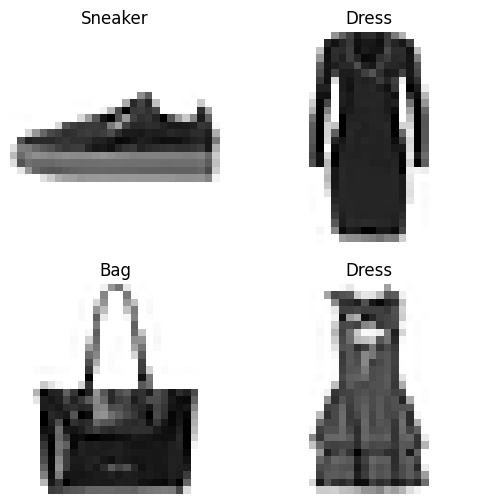

In [42]:
import matplotlib.pyplot as plt
import random

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# idx = 17
# plt.imshow(train_data[idx])
# plt.title(class_name[train_labels[idx]])

plt.figure(figsize=(6, 6))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  ax.set_axis_off()
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])


### Build a multi-class classification model

In [51]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_00 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) # output shape is 10 (one per class of clothing)
])

# Compile the model
model_00.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
non_norm_history = model_00.fit(train_data,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1629 - accuracy: 0.1628 - val_loss: 1.8070 - val_accuracy: 0.2133
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7039 - accuracy: 0.2534 - val_loss: 1.6755 - val_accuracy: 0.2821
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6331 - accuracy: 0.2817 - val_loss: 1.6065 - val_accuracy: 0.3005
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6032 - accuracy: 0.2863 - val_loss: 1.6056 - val_accuracy: 0.2981
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5975 - accuracy: 0.2932 - val_loss: 1.6016 - val_accuracy: 0.2884
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5913 - accuracy: 0.2967 - val_loss: 1.5698 - val_accuracy: 0.3157
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5738 - accuracy: 0.3153 - val_loss: 1.5715 - val_accuracy:

In [57]:
model_00.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Normalize data

In [55]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_01 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) # output shape is 10 (one per class of clothing)
])

# Compile the model
model_01.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
norm_history = model_01.fit(train_data_norm,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

<AxesSubplot: title={'center': 'Normalized Data'}>

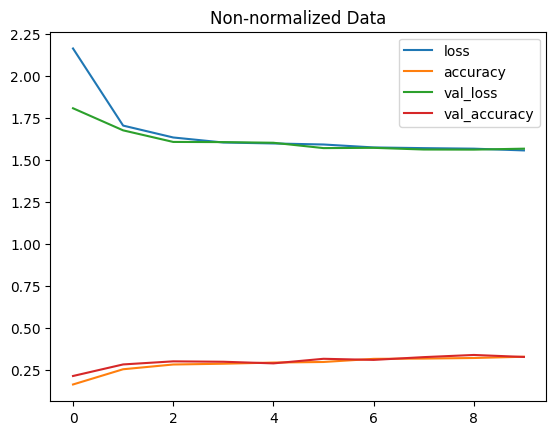

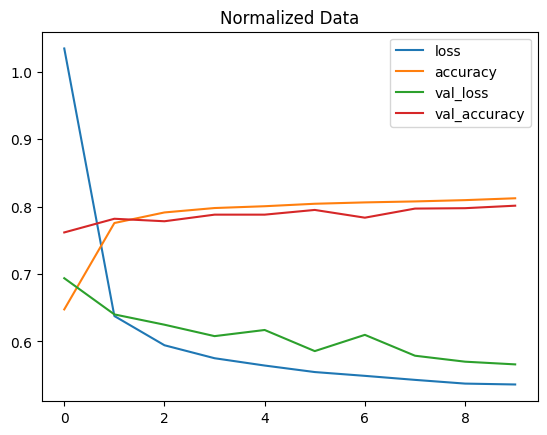

In [58]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

### Find the ideal learning rate

In [61]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_02 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) # output shape is 10 (one per class of clothing)
])

# Compile the model
model_02.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

# Fit the model
find_lr_history = model_02.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

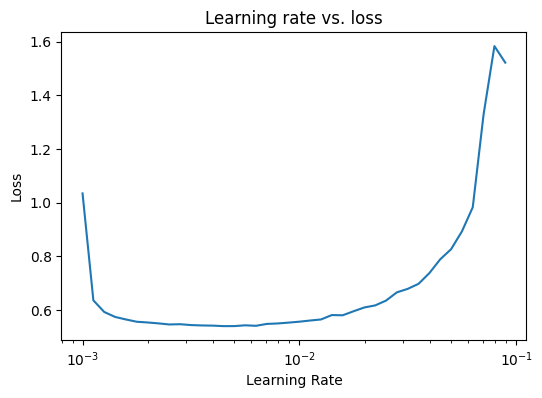

In [64]:
import numpy as np

lrs = 1e-3 * (10**(np.arange(40)/20))

plt.figure(figsize=(6, 4))
plt.semilogx(lrs, find_lr_history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In this case, it looks like somewhere close to the default learning rate of the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) (`0.001`) is the ideal learning rate.

In [67]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_03 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) # output shape is 10 (one per class of clothing)
])

# Compile the model
model_03.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
ideal_lr_history = model_03.fit(train_data_norm,
                             train_labels,
                             epochs=20,
                             validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

### Evaluatemulti-class classification model

In [66]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [68]:
# Make predictions with the most recent model
y_probs = model_03.predict(test_data)

# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

313/313 [==============================] - 0s 893us/step


array([9, 2, 1, 1, 6, 1, 4, 4, 8, 7], dtype=int64)

In [69]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[565,   5,  20,  88,  49,   0, 256,   0,  17,   0],
       [  2, 934,   1,  30,  25,   0,   7,   0,   1,   0],
       [  7,   1, 429,   8, 462,   0,  65,   0,  27,   1],
       [ 14,  10,   6, 714, 179,   0,  23,   0,  53,   1],
       [  0,   0,  19,   4, 953,   0,  11,   0,  10,   3],
       [  0,   0,   1,   0,   1, 161,   0,  69, 108, 660],
       [ 62,   1,  86,  39, 516,   0, 262,   0,  34,   0],
       [  0,   0,   0,   0,   0,   0,   0, 765,   3, 232],
       [  2,   0,  12,  12,  31,   0,   3,   3, 919,  18],
       [  0,   0,   1,   0,   1,   0,   0,  10,   0, 988]], dtype=int64)

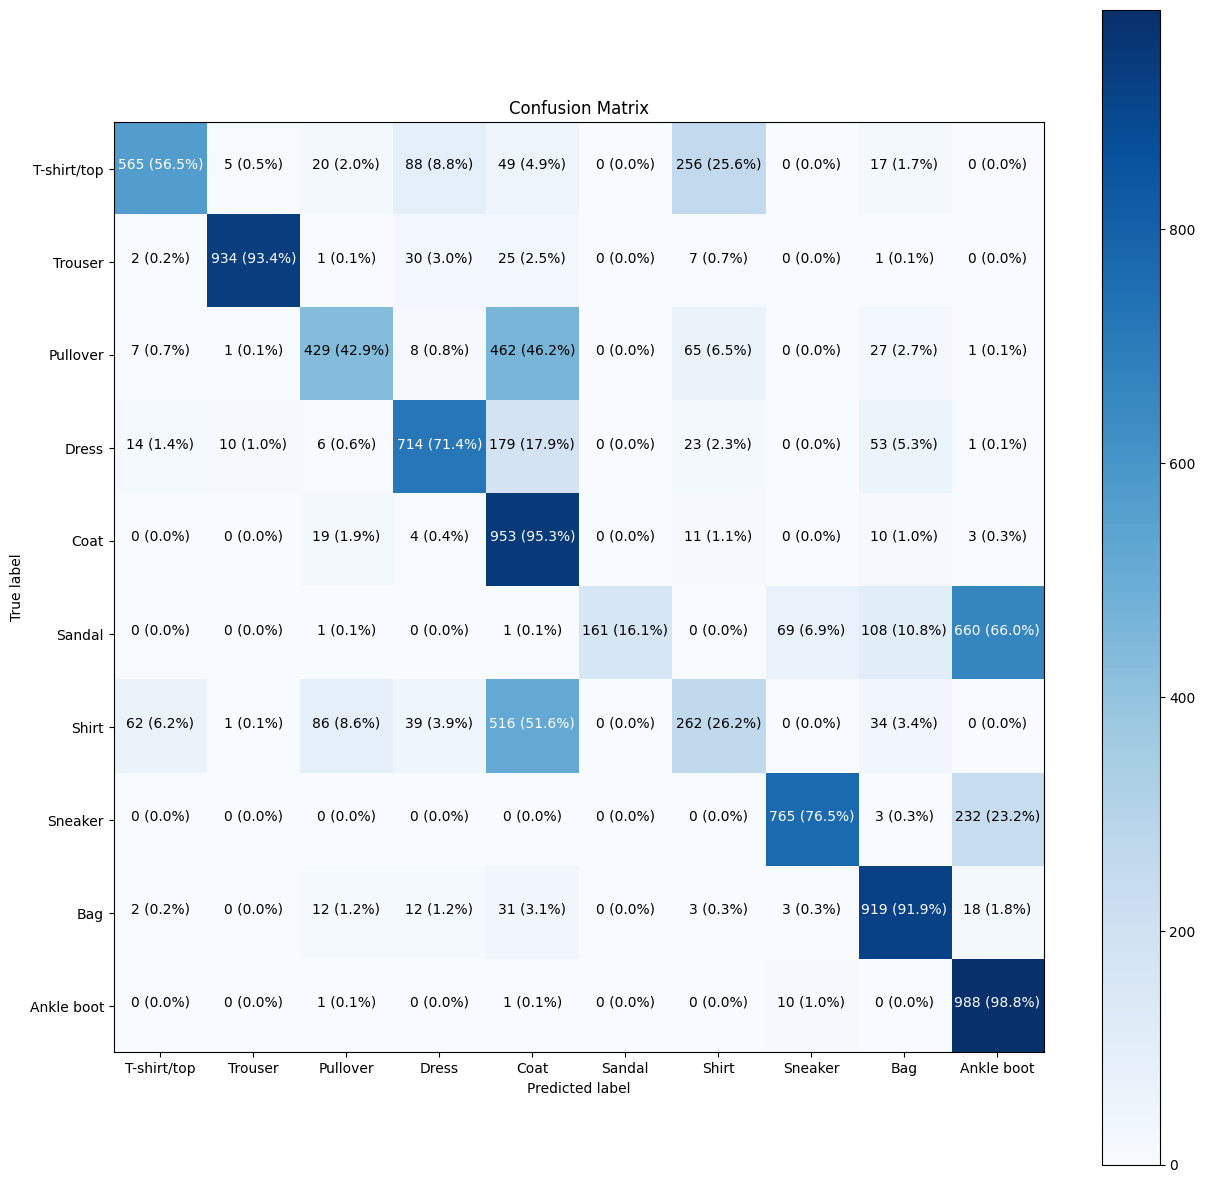

In [75]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

### Visualize random model prediction

In [126]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
    """Picks a random image, plots it and labels it with a predicted and truth label.

    Args:
      model: a trained model (trained on data similar to what's in images).
      images: a set of random images (in tensor form).
      true_labels: array of ground truth labels for images.
      classes: array of class names for images.
    
    Returns:
      A plot of a random image from `images` with a predicted class label from `model`
      as well as the truth class label from `true_labels`.
    """ 
    # Setup random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
       color = "green"
    else:
       color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # set the color to green or red

1/1 [==============================] - 0s 17ms/step


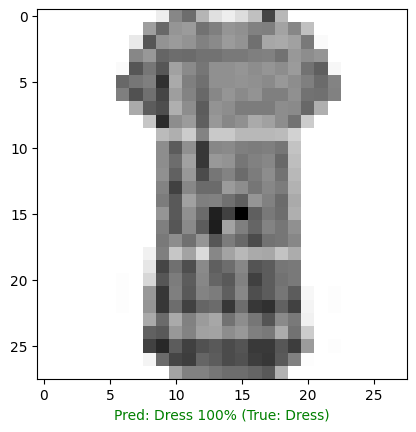

In [127]:
plot_random_image(model=model_03, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)